# * **Name**: Yaniv Kaveh Shtul
# * **Id**: 206768004
# * **Profile_url**: https://www.kaggle.com/yanivkavehshtul

# **The competition**

**The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).**


**I will try to build the model by analyzing, engineering and experimenting on the data.**

# **Import libraries**

In [1]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn import neural_network

# define plt settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (12, 10)
plt.rcParams["legend.title_fontsize"] = 20

# **Importing data**

In [2]:
titanic_df = pd.read_csv("/kaggle/input/titanic/train.csv")
titanic_test = pd.read_csv("/kaggle/input/titanic/test.csv")
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Dataset info

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Remove unnecessary columns**

**The "Name" column is not important. The important data of the column is the family name to indentify other family members on the ship.
This data is in the columns: "SibSp" and "Parch", thats why removing the column will not make an impact on the result.
"PassengerId" column is not important because it is just a counter of passengers, thats why im dropped the coulmn too.
I dropped "Ticket" column because it is just a "random" number.**

In [4]:
titanic_df = titanic_df.drop(columns=['Name', 'PassengerId', 'Ticket'], axis=1)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [5]:
#Changing the "Sex" column to numeric, male - 1.0 , female - 0.0
#titanic_df = pd.get_dummies(titanic_df,dtype=float, columns=['Sex'], prefix=["Sex_type_is"], drop_first=True)
#titanic_df

# **Insert values into null cells**

In [6]:
#Dataset info
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [7]:
# replace all empty values to np.NaN values
titanic_df.replace('', np.NaN, inplace=True)
titanic_df.fillna(np.NaN, inplace=True)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [8]:
# count empty values in each column
def count_empty_values_in_each_column(df):
    print('empty values:')
    code = "len(np.where(df[column].isnull())[0])"
    for column in df.columns:
        print(f'`{column}`: {eval(code)}')

count_empty_values_in_each_column(titanic_df)

empty values:
`Survived`: 0
`Pclass`: 0
`Sex`: 0
`Age`: 177
`SibSp`: 0
`Parch`: 0
`Fare`: 0
`Cabin`: 687
`Embarked`: 2


**As we can see there are empty cells in the features: Age, Cabin and Embarked. 77% of the Cabin feature missing values and filling this many cells can impact on the resualt. We will insert values and I will train the dataset with and without the feature to find the better result**

In [9]:
# fill empty values in the dataframe
def fill_na_median(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].median(), inplace=True)

def fill_na_random_pick_column_distribution(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df_null = df[df[column_name].isnull()]
    options = np.random.choice(df_not_null[column_name])
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)
    
fill_na_median(titanic_df,'Age')
fill_na_random_pick_column_distribution(titanic_df, 'Cabin')
fill_na_random_pick_column_distribution(titanic_df, 'Embarked')
titanic_df

/tmp/ipykernel_74/602903894.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(df_not_null[column_name].median(), inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,C106,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,F G73,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,B42,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,C52,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,28.0,1,2,23.4500,B19,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [10]:
# check for empty values
count_empty_values_in_each_column(titanic_df)


empty values:
`Survived`: 0
`Pclass`: 0
`Sex`: 0
`Age`: 0
`SibSp`: 0
`Parch`: 0
`Fare`: 0
`Cabin`: 0
`Embarked`: 0


# Encode columns

In [11]:
# using LabelEncoder from sklearn to change Cabin to numbers depanding their lables
lb = sklearn.preprocessing.LabelEncoder()
titanic_df['Cabin'] = lb.fit_transform(titanic_df['Cabin'])

# dummy encode Sex and Embarked
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], prefix=["Sex_type_is", "Embarked at"], drop_first=True, dtype=float)
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_type_is_male,Embarked at_Q,Embarked at_S
0,0,3,22.0,1,0,7.2500,51,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,81,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,140,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,55,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,30,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,71,1.0,0.0,1.0
887,1,1,19.0,0,0,30.0000,30,0.0,0.0,1.0
888,0,3,28.0,1,2,23.4500,18,0.0,0.0,1.0
889,1,1,26.0,0,0,30.0000,60,1.0,0.0,0.0


# Test data manipulation (same as train_set)

In [12]:
#Cleaning data
titanic_test = titanic_test.drop(columns=['Name', 'PassengerId', 'Ticket'], axis=1)
titanic_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


In [13]:
titanic_test.info()

# replace all empty values to np.NaN values
titanic_test.replace('', np.NaN, inplace=True)
titanic_test.fillna(np.NaN, inplace=True)

# count empty values in each column
count_empty_values_in_each_column(titanic_test)
titanic_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB
empty values:
`Pclass`: 0
`Sex`: 0
`Age`: 86
`SibSp`: 0
`Parch`: 0
`Fare`: 1
`Cabin`: 327
`Embarked`: 0


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


In [14]:
#Filling empty cells
fill_na_median(titanic_test,'Age')
fill_na_median(titanic_test,'Fare')

fill_na_random_pick_column_distribution(titanic_test, 'Cabin')
fill_na_random_pick_column_distribution(titanic_test, 'Embarked')
titanic_test

/tmp/ipykernel_74/602903894.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(df_not_null[column_name].median(), inplace=True)
/tmp/ipykernel_74/602903894.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,C53,Q
1,3,female,47.0,1,0,7.0000,E52,S
2,2,male,62.0,0,0,9.6875,E50,Q
3,3,male,27.0,0,0,8.6625,C89,S
4,3,female,22.0,1,1,12.2875,D22,S
...,...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,C106,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,D28,S
416,3,male,27.0,0,0,8.0500,C62 C64,S


In [15]:
# check for empty values
count_empty_values_in_each_column(titanic_test)

empty values:
`Pclass`: 0
`Sex`: 0
`Age`: 0
`SibSp`: 0
`Parch`: 0
`Fare`: 0
`Cabin`: 0
`Embarked`: 0


In [16]:
# using LabelEncoder from sklearn to change Cabin to numbers depanding their lables
lb = sklearn.preprocessing.LabelEncoder()
titanic_test['Cabin'] = lb.fit_transform(titanic_test['Cabin'])

# dummy encode Sex and Embarked
titanic_test = pd.get_dummies(titanic_test, columns=['Sex', 'Embarked'], prefix=["Sex_type_is", "Embarked at"], drop_first=True, dtype=float)
titanic_test

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_type_is_male,Embarked at_Q,Embarked at_S
0,3,34.5,0,0,7.8292,35,1.0,1.0,0.0
1,3,47.0,1,0,7.0000,66,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,65,1.0,1.0,0.0
3,3,27.0,0,0,8.6625,45,1.0,0.0,1.0
4,3,22.0,1,1,12.2875,52,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,23,1.0,0.0,1.0
414,1,39.0,0,0,108.9000,22,0.0,0.0,0.0
415,3,38.5,0,0,7.2500,53,1.0,0.0,1.0
416,3,27.0,0,0,8.0500,39,1.0,0.0,1.0


# Features engineering

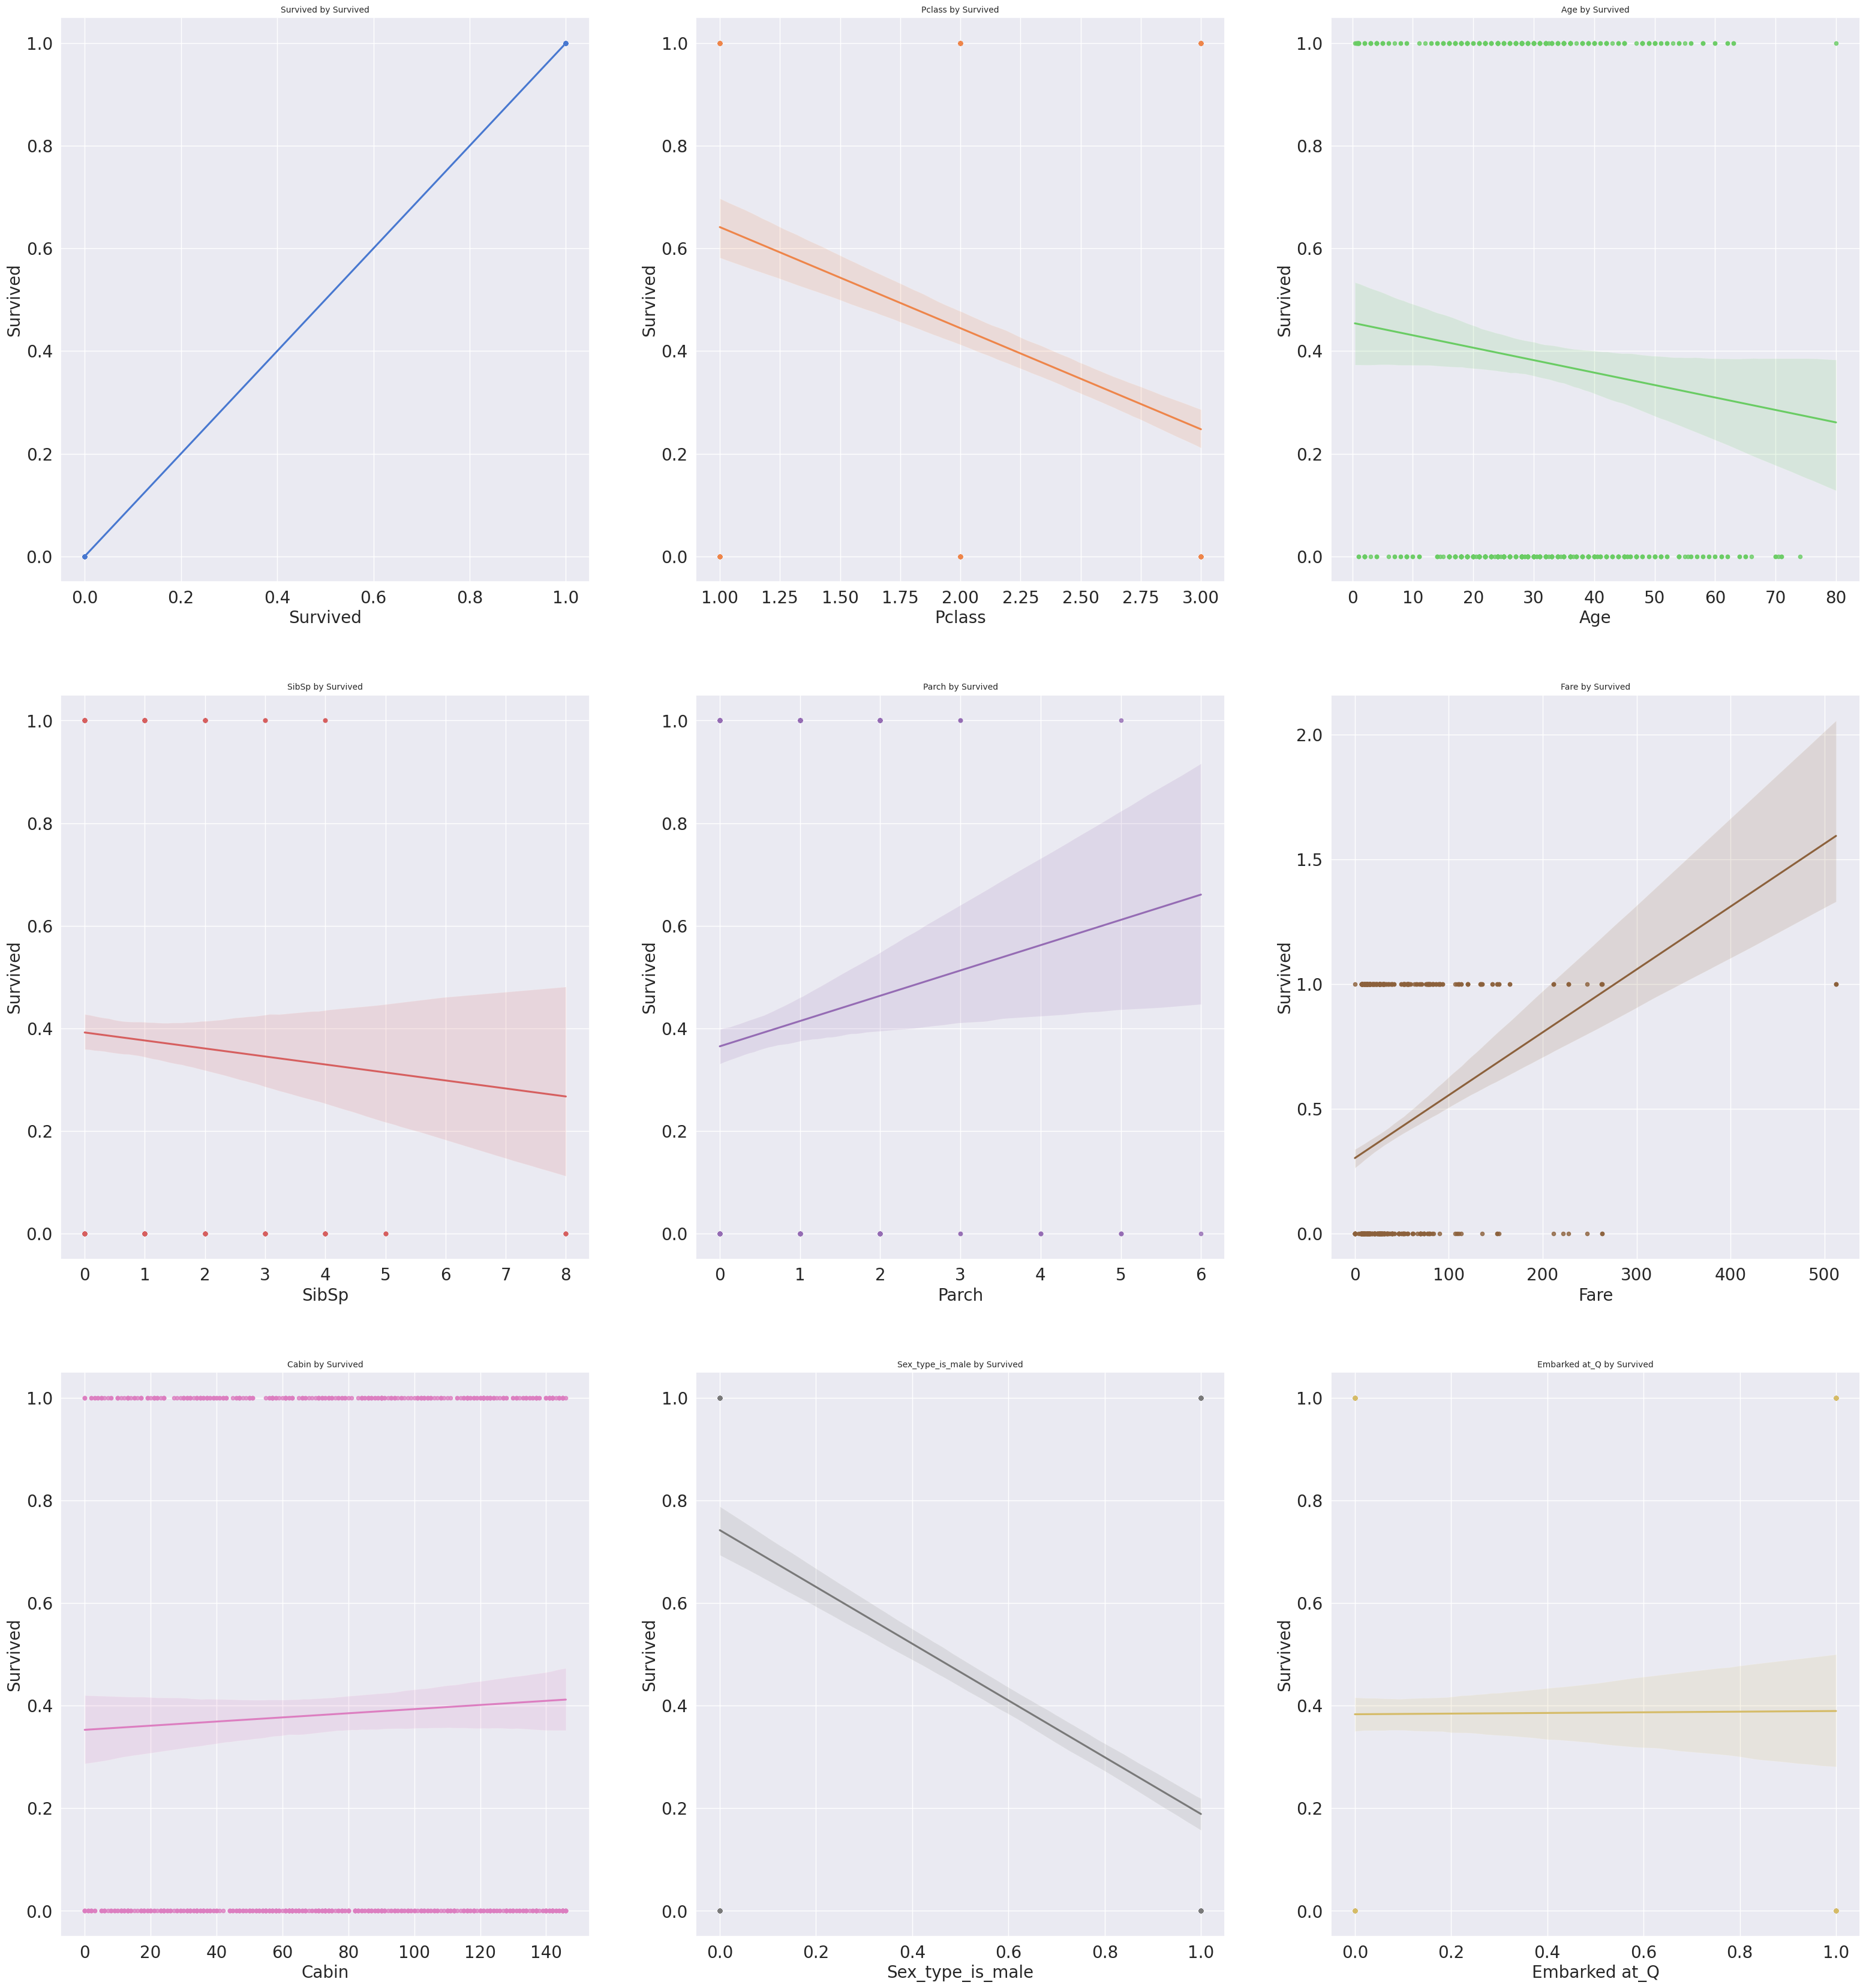

In [17]:
# get color map
def get_sns_cmap(n, name='muted'):
    return sns.color_palette(palette=name, n_colors=n)

# plot with regression line target values by each feature
def plot_reg_target_values_by_each_feature(df, target_column_name):
    nrows = math.ceil(math.sqrt(len(df.columns)-1))
    ncols = math.ceil((len(df.columns)-1)/nrows)
    fig, axes = plt.subplots(nrows, ncols)
    plt.subplots_adjust(top=3.2, bottom=0, left=0, right=2.5)
    colors = get_sns_cmap(len(df.columns))

    counter = 0
    for i in range(len(df.columns)-1):
        ax = sns.regplot(x=df.columns[i], y=target_column_name, data=df, color=colors[i], ax=axes[i//nrows, i%nrows], scatter_kws={"s": 20})
        ax.set_title(label=f'{df.columns[i]} by {target_column_name}', fontsize=10)

    for i in range(len(df.columns)-1, nrows*ncols):
        fig.delaxes(axes.flatten()[i])


plot_reg_target_values_by_each_feature(titanic_df, 'Survived')

**It is hard to decide with feature as a good correlation. Lets check the heatmap for more information.**

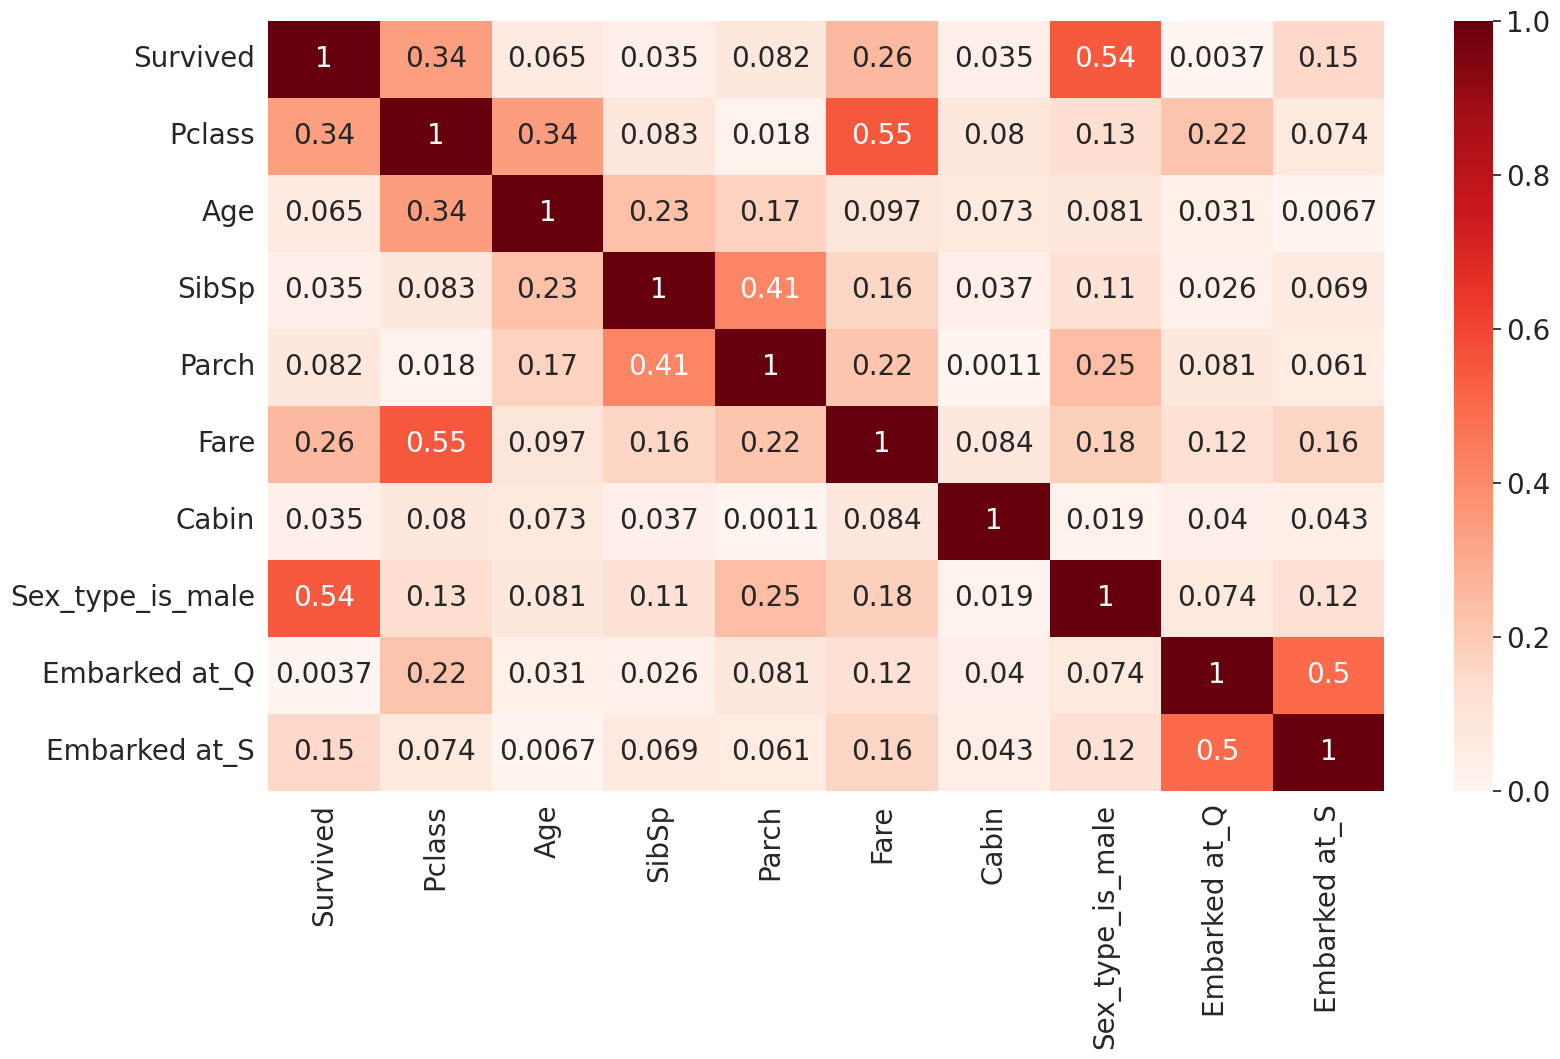

In [18]:
# show absolute correlation between features in a heatmap
plt.figure(figsize=(18,10))
cor = np.abs(titanic_df.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.show()

**It is look like that "Sex_type_is_male" has a good correlation with survived. In addition "Fare" and "Pclass" has good correlation. Lets try to make a new features that will connect both.**

**The new feature is: Fare_Class = Fare / Pclass**

In [19]:
# Adding the new feature to the dataset
titanic_df.insert(len(titanic_df.columns), 'Fare_Class', titanic_df['Fare'] / titanic_df['Pclass'])
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_type_is_male,Embarked at_Q,Embarked at_S,Fare_Class
0,0,3,22.0,1,0,7.2500,51,1.0,0.0,1.0,2.416667
1,1,1,38.0,1,0,71.2833,81,0.0,0.0,0.0,71.283300
2,1,3,26.0,0,0,7.9250,140,0.0,0.0,1.0,2.641667
3,1,1,35.0,1,0,53.1000,55,0.0,0.0,1.0,53.100000
4,0,3,35.0,0,0,8.0500,30,1.0,0.0,1.0,2.683333
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,71,1.0,0.0,1.0,6.500000
887,1,1,19.0,0,0,30.0000,30,0.0,0.0,1.0,30.000000
888,0,3,28.0,1,2,23.4500,18,0.0,0.0,1.0,7.816667
889,1,1,26.0,0,0,30.0000,60,1.0,0.0,0.0,30.000000


**Lets check if the new feature in a good correlation with the "Survived"(goal)**

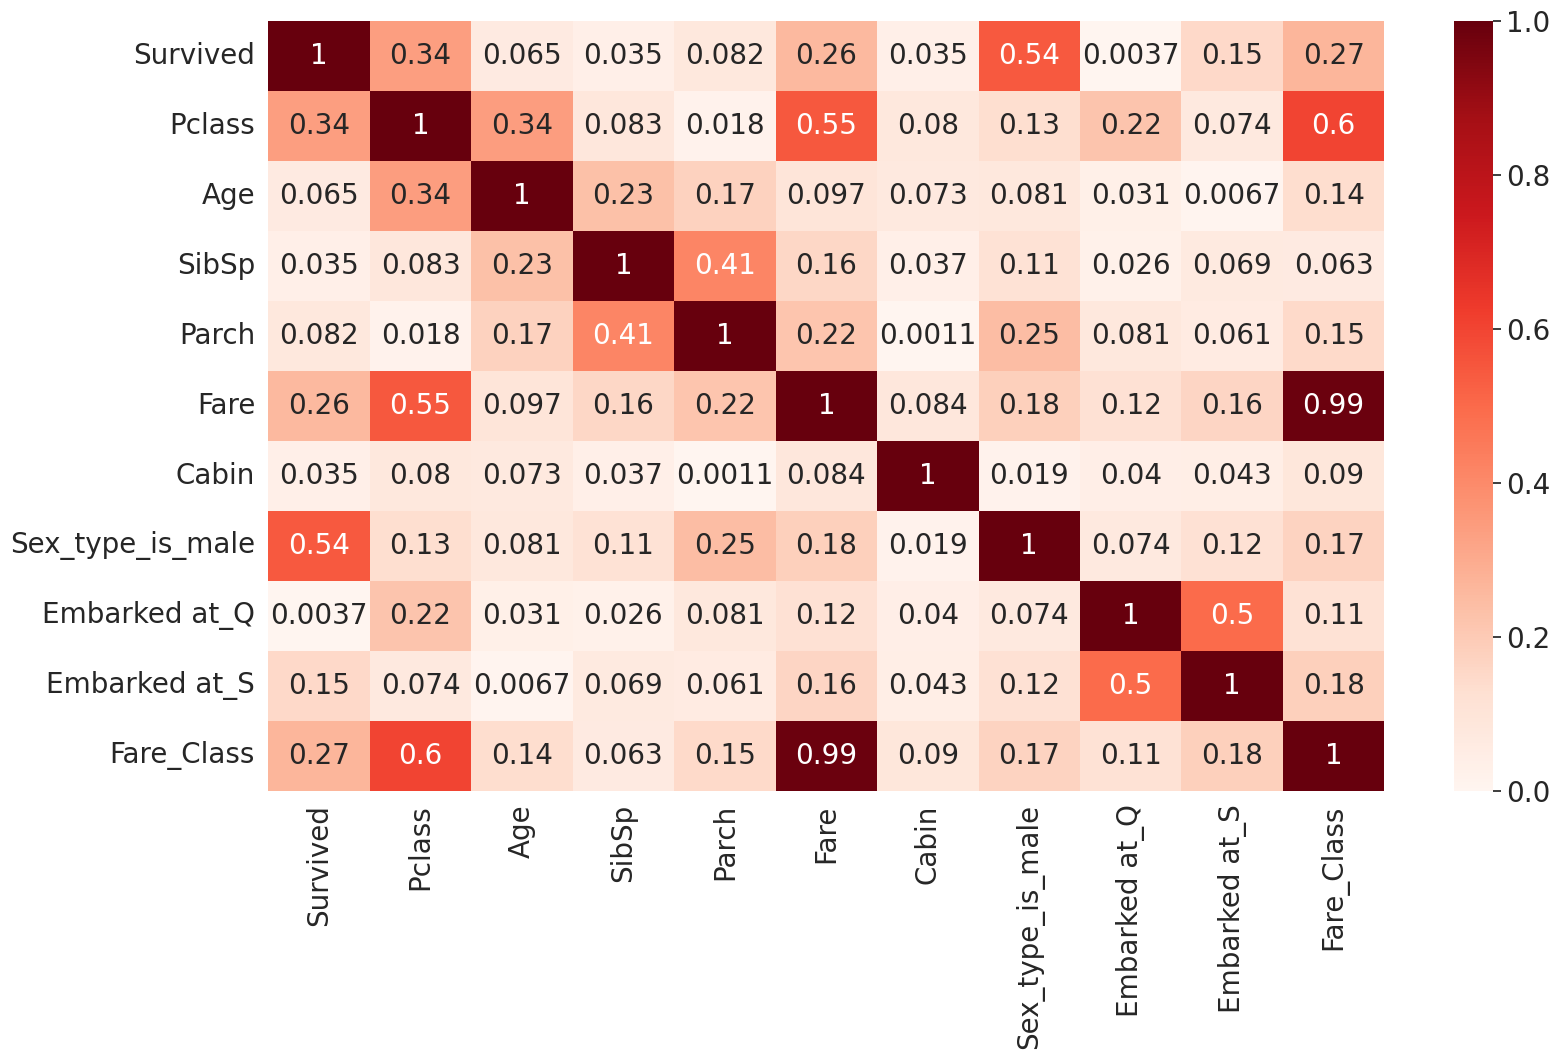

In [20]:
# show absolute correlation between features in a heatmap
plt.figure(figsize=(18,10))
cor = np.abs(titanic_df.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.show()

****As we can see the new feature as a good correlation with the goal so we will keep the feature and change the test as well. In addition the "Cabin" feature has bad correlation with the "Survived" and because of that we will save a copy of the titanic_df and titanic_test without the feature ****

In [21]:
# Adding the new feature to the Test
titanic_test.insert(len(titanic_test.columns), 'Fare_Class', titanic_test['Fare'] / titanic_test['Pclass'])
titanic_test

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_type_is_male,Embarked at_Q,Embarked at_S,Fare_Class
0,3,34.5,0,0,7.8292,35,1.0,1.0,0.0,2.609733
1,3,47.0,1,0,7.0000,66,0.0,0.0,1.0,2.333333
2,2,62.0,0,0,9.6875,65,1.0,1.0,0.0,4.843750
3,3,27.0,0,0,8.6625,45,1.0,0.0,1.0,2.887500
4,3,22.0,1,1,12.2875,52,0.0,0.0,1.0,4.095833
...,...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,23,1.0,0.0,1.0,2.683333
414,1,39.0,0,0,108.9000,22,0.0,0.0,0.0,108.900000
415,3,38.5,0,0,7.2500,53,1.0,0.0,1.0,2.416667
416,3,27.0,0,0,8.0500,39,1.0,0.0,1.0,2.683333


In [22]:
#make copies of titanic_df and titanic_test
n_cabin_df = titanic_df.copy()
n_cabin_test = titanic_test.copy()

#Dropping Cabin
n_cabin_df = n_cabin_df.drop('Cabin', axis=1)
n_cabin_test = n_cabin_test.drop('Cabin', axis=1)

n_cabin_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_type_is_male,Embarked at_Q,Embarked at_S,Fare_Class
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,2.416667
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,71.283300
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,2.641667
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,53.100000
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0,2.683333
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1.0,0.0,1.0,6.500000
887,1,1,19.0,0,0,30.0000,0.0,0.0,1.0,30.000000
888,0,3,28.0,1,2,23.4500,0.0,0.0,1.0,7.816667
889,1,1,26.0,0,0,30.0000,1.0,0.0,0.0,30.000000


# **Data Slicing**

In [23]:
# print 4 graphs: mse of train/test and r2 of train/test
def print_graphs_r2_mse(graph_points):
    for k, v in graph_points.items():
        best_value = max(v.values()) if 'R2' in k else min(v.values())
        best_index = np.argmax(list(v.values())) if 'R2' in k else np.argmin(list(v.values()))
        color = 'red' if 'train' in k else 'blue'
        fig = px.scatter(x=v.keys(), y=v.values(), title=f'{k}, best value: x={best_index + 1}, y={best_value}', color_discrete_sequence=[color])
        fig.data[0].update(mode='markers+lines')
        fig.show()

In [24]:
def plot_score_and_loss_by_split_SGD(x, t):
    graph_points = {
                    'train_CE':{},
                    'val_CE': {},
                    'train_R2': {},
                    'val_R2': {}
                    }

    for size in range(10, 100, 10):
        x_train, x_val, t_train, t_val = model_selection.train_test_split(x, t, test_size=size/100, random_state=42)
        SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.01)).fit(x_train, t_train)
        y_train_prob = SGD_cls.predict_proba(x_train)
        y_test_prob = SGD_cls.predict_proba(x_val)
        y_train = SGD_cls.predict(x_train)
        y_val = SGD_cls.predict(x_val)
        graph_points['train_CE'][size/100] = metrics.log_loss(t_train, y_train_prob)
        graph_points['val_CE'][size/100] = metrics.log_loss(t_val, y_test_prob)
        graph_points['train_R2'][size/100] = SGD_cls.score(x_train, t_train)
        graph_points['val_R2'][size/100] = SGD_cls.score(x_val, t_val)
    print_graphs_r2_mse(graph_points)

# SGD train

In [25]:
# divide the data to features and target
t = titanic_df['Survived'].copy()
X = titanic_df.drop(['Survived'], axis=1)
print('t')
display(t)
print()
print('X')
display(X)

t


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


X


,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_type_is_male,Embarked at_Q,Embarked at_S,Fare_Class
0,3,22.0,1,0,7.2500,51,1.0,0.0,1.0,2.416667
1,1,38.0,1,0,71.2833,81,0.0,0.0,0.0,71.283300
2,3,26.0,0,0,7.9250,140,0.0,0.0,1.0,2.641667
3,1,35.0,1,0,53.1000,55,0.0,0.0,1.0,53.100000
4,3,35.0,0,0,8.0500,30,1.0,0.0,1.0,2.683333
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,71,1.0,0.0,1.0,6.500000
887,1,19.0,0,0,30.0000,30,0.0,0.0,1.0,30.000000
888,3,28.0,1,2,23.4500,18,0.0,0.0,1.0,7.816667
889,1,26.0,0,0,30.0000,60,1.0,0.0,0.0,30.000000


In [26]:
plot_score_and_loss_by_split_SGD(X, t)

# Lets try with MLP train

In [27]:
def plot_score_and_loss_by_split_MLP(x, t):
        graph_points = {
                    'train_CE':{},
                    'val_CE': {},
                    'train_R2': {},
                    'val_R2': {}
                    }

        for size in range(10, 100, 10):
            x_train, x_val, t_train, t_val = model_selection.train_test_split(x, t, test_size=size/100, random_state=42)
            MLP_cls = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=40000).fit(x_train, t_train)
            y_train_prob = MLP_cls.predict_proba(x_train)
            y_test_prob = MLP_cls.predict_proba(x_val)
            graph_points['train_CE'][size/100] = metrics.log_loss(t_train, y_train_prob)
            graph_points['val_CE'][size/100] = metrics.log_loss(t_val, y_test_prob)
            graph_points['train_R2'][size/100] = MLP_cls.score(x_train, t_train)
            graph_points['val_R2'][size/100] = MLP_cls.score(x_val, t_val)
        print_graphs_r2_mse(graph_points)

In [28]:
plot_score_and_loss_by_split_MLP(X, t)

# No Cabin SGD train

In [29]:
# divide the data to features and target
n_cabin_t = n_cabin_df['Survived'].copy()
n_cabin_X = n_cabin_df.drop(['Survived'], axis=1)
print('t')
display(n_cabin_t)
print()
print('X')
display(n_cabin_X)

plot_score_and_loss_by_split_SGD(n_cabin_X, n_cabin_t)

t


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


X


,Pclass,Age,SibSp,Parch,Fare,Sex_type_is_male,Embarked at_Q,Embarked at_S,Fare_Class
0,3,22.0,1,0,7.2500,1.0,0.0,1.0,2.416667
1,1,38.0,1,0,71.2833,0.0,0.0,0.0,71.283300
2,3,26.0,0,0,7.9250,0.0,0.0,1.0,2.641667
3,1,35.0,1,0,53.1000,0.0,0.0,1.0,53.100000
4,3,35.0,0,0,8.0500,1.0,0.0,1.0,2.683333
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1.0,0.0,1.0,6.500000
887,1,19.0,0,0,30.0000,0.0,0.0,1.0,30.000000
888,3,28.0,1,2,23.4500,0.0,0.0,1.0,7.816667
889,1,26.0,0,0,30.0000,1.0,0.0,0.0,30.000000


# Conclusion from the graph

**As we can see the SGD train has better result than the MLP train. thats why we will use the SGD train. Surprisingly the Cabin feature is necessary to get a better score, thats why we will use the train with the cabin feature.**

**In addition,We can see that from 0.1 to 0.7, the validation loss is smaller than the train loss, and from 0.75 to 0.9 the train loss is smaller than the validation loss.
So, let's give the validation group 25% of the dataset, it is about the right point where the validation loss is equale to the train loss.**

# Classification

In [30]:
# split the data to 75% train and 25% validation
t = titanic_df['Survived']
X = titanic_df.drop('Survived', axis=1)
X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(
    X, t, test_size=0.25, random_state=42)

In [31]:
# create the SGDClassifier and predict the probabilities of the train and test data
SGD_cls = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
     linear_model.SGDClassifier(loss='log_loss', alpha=0,
                                learning_rate='constant',
                                eta0=0.01)
     ).fit(X_train, t_train)

y_train_prob = SGD_cls.predict_proba(X_train)
y_test_prob = SGD_cls.predict_proba(X_test)

y_train = SGD_cls.predict(X_train)
y_test = SGD_cls.predict(X_test)


In [32]:
# print the accuracy score and CE loss of the train and test
print('Accuracy score on train',
      SGD_cls.score(X_train, t_train))
print('Accuracy score on test',
      SGD_cls.score(X_test, t_test))
print()
print('CE on train',
      metrics.log_loss(t_train, y_train_prob))
print('CE on test',
      metrics.log_loss(t_test, y_test_prob))


Accuracy score on train 0.8023952095808383
Accuracy score on test 0.7982062780269058

CE on train 0.44896870362104946
CE on test 0.41626943093058943


# Predict test

In [33]:
prediction = SGD_cls.predict(titanic_test)

# Sumbission

In [34]:
submission['Survived'] = prediction
submission.to_csv('submission.csv', index=False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Screenshots

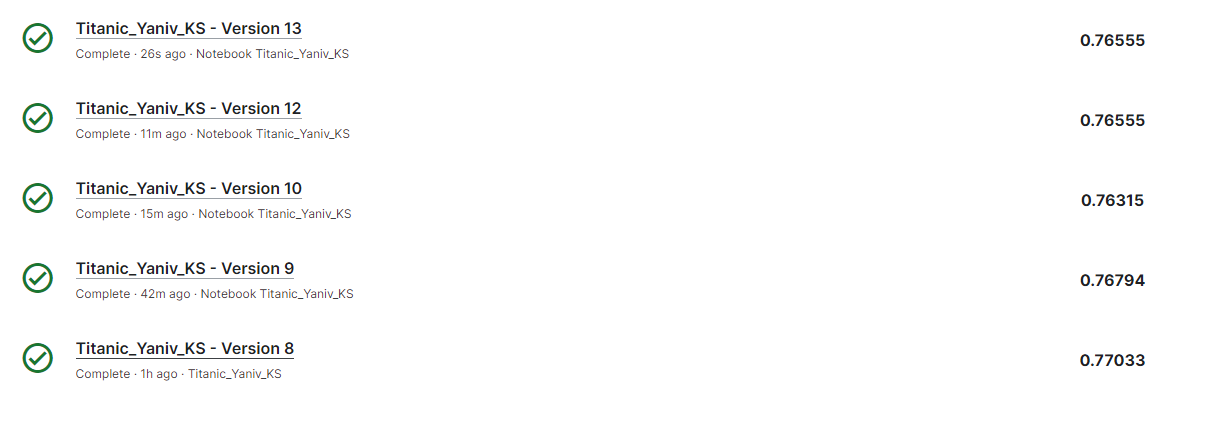

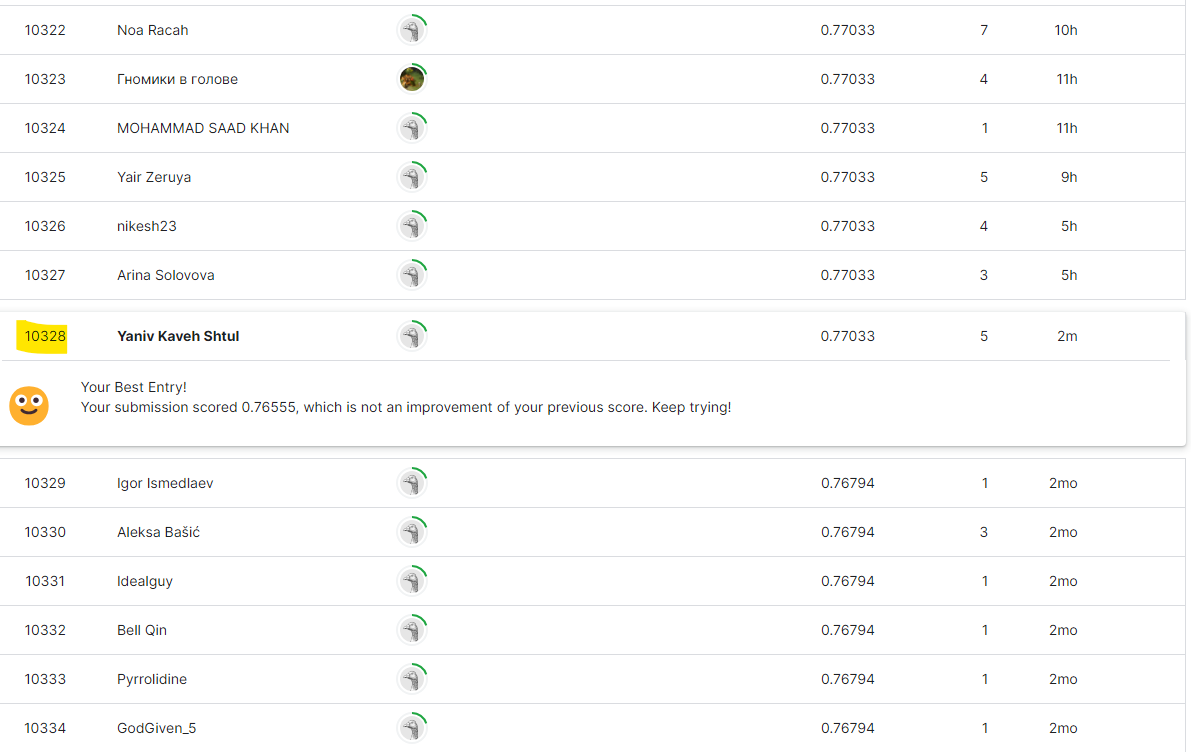

# Conclusion

**After analyzing the data I eliminated unnecessary features and completed empty cells with median and random methods. I notice that 77% of the "Cabin" feature (in the training data) was empty that can impact negatively on the score. Surprisingly after checking the training data with and without the Cabin feature I found out that the feature is necessary to get a better score. With heat map I found out that "Fare" and "Pclass" have a good correlation so I made a feature out of them to increase the final score. Later I ran experiments on two different models: SGD and MLP. It turns out that the better model with the better score is SGD. In the end I spit the train into train set and validation set with ratio of 75% : 25% and ran the SGD model on the sets and the test to get the result.**

# References

sklearn site - https://scikit-learn.org/stable/

Afeka practice notebooks 2-4
